<a href="https://colab.research.google.com/github/mastro98/mnist-prova1/blob/master/prova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
def contatore(lista):
  counter=0
  for el in lista:
    counter+=1
  return counter

vec=[[4,5,5],[5,8,7]]
lista=[1,"g",3,("comb",1),4,5,6]

for element in lista:
  print(element)

if 1 in lista:
  print("presente")
   
dicto={"primo":1}
print(dicto["primo"])
print (contatore(lista))
print('lista \n',lista)
print('vettore \n', vec)
vec=np.array(vec)
print('\n')
print( 'np_array \n', vec)

1
g
3
('comb', 1)
4
5
6
presente
1
7
lista 
 [1, 'g', 3, ('comb', 1), 4, 5, 6]
vettore 
 [[4, 5, 5], [5, 8, 7]]


np_array 
 [[4 5 5]
 [5 8 7]]


In [ ]:
!pip3 install tensorflow
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
tfds.list_builders()
#ds_train=tfds.load(name='coil100',split='train')
#ds_test=tfds.load(name='coil100',split='test')
#builder=tfds.builder('coil100')
#info=builder.info
#info
#fig=tfds.show_examples(info,ds_train)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
percorso_dir /content/drive/My Drive/coil20
nome_dir []
nomi_files ['obj15__65.png', 'obj16__11.png', 'obj15__69.png', 'obj16__10.png', 'obj15__56.png', 'obj16__12.png', 'obj15__5.png', 'obj15__66.png', 'obj15__70.png', 'obj16__60.png', 'obj16__48.png', 'obj16__33.png', 'obj16__43.png', 'obj16__61.png', 'obj16__38.png', 'obj16__56.png', 'obj16__49.png', 'obj16__36.png', 'obj16__5.png', 'obj16__39.png', 'obj16__55.png', 'obj16__51.png', 'obj16__25.png', 'obj16__40.png', 'obj16__28.png', 'obj16__53.png', 'obj16__45.png', 'obj16__3.png', 'obj16__50.png', 'obj16__64.png', 'obj16__52.png', 'obj16__63.png', 'obj16__58.png', 'obj16__59.png', 'obj16__29.png', 'obj16__6.png', 'obj16__35.png', 'obj16__62.png', 'obj16__57.png', 'obj16__26.png', 'obj16__41.png', 'obj16__32.png', 'obj16__47.png', 'obj16__4.png', 'obj16__34.png', 'obj16__42.png', 'obj16__46.png', 'obj16__4

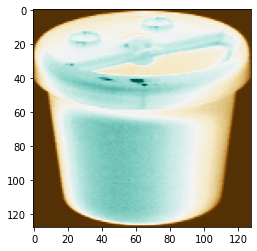

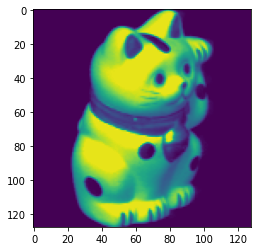

(964, 128, 128)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

DATADIR = '/content/drive/My Drive/coil20'
classi=[]
training_data=[]
labels=[]
for dirpath, dirnames, filenames in os.walk(DATADIR):
    print('percorso_dir',dirpath)
    print('nome_dir',dirnames)
    print('nomi_files',filenames)

for i in range(len(filenames)):
    nome_foto=filenames[i]
    classe=nome_foto[3:5]
    
    if classe[1]=='_':
       classe=classe.replace('_','')

    classe=int(classe)
    classi.append(classe)
classi=np.array(classi)

for img in os.listdir(dirpath): 
    img_array = cv2.imread(os.path.join(dirpath,img) ,cv2.IMREAD_GRAYSCALE) 
    #new_array = cv2.resize(img_array, (100, 100)) 
    #print(new_array)
    training_data.append(img_array)


training_data=np.array(training_data)     
print(training_data[0].shape) 

#for i in range(100):
 # plt.imshow(training_data[i], cmap='gray')
  #plt.show()
  #print(classi[i])
    
plt.imshow(training_data[0], cmap='BrBG')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(training_data, classi, test_size=0.33, random_state=1)    
plt.imshow(X_train[100])
plt.show() 

X_train=X_train.astype('float32')


X_test=X_test.astype('float32')
X_train/=255
X_test/=255
#plt.imshow(X_train[100])
#plt.show() 
X_train.shape


In [30]:
!pip3 install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

X_train_reshape = np.array(X_train).reshape(-1, 128,128 , 1)
X_test_reshape = np.array(X_test).reshape(-1, 128,128 , 1)

model = Sequential()

model.add(Conv2D(256, (3, 3), padding='same', input_shape=X_train_reshape.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(30))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.fit(X_train_reshape, y_train, batch_size=32, epochs=3, validation_split=0.3)



Epoch 1/3
22/22 [==============================] - 216s 10s/step - loss: 2.0874 - accuracy: 0.4911 - val_loss: 0.7879 - val_accuracy: 0.7897
Epoch 2/3
22/22 [==============================] - 209s 10s/step - loss: 0.1787 - accuracy: 0.9540 - val_loss: 0.1161 - val_accuracy: 0.9724
Epoch 3/3
22/22 [==============================] - 215s 10s/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0762 - val_accuracy: 0.9828


In [35]:
X_test_reshape = np.array(X_test).reshape(-1, 128,128 , 1)
predictions=model.predict([X_test_reshape])

In [41]:
print(np.argmax(predictions[400]))


5


<function matplotlib.pyplot.show>

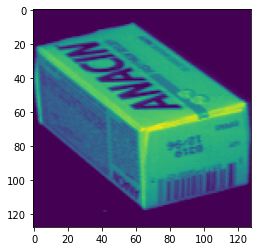

In [42]:
plt.imshow(X_test[400])
plt.show

In [ ]:
X_test=np.array(X_test)
X_test[0]

In [ ]:
print(X_test)
print(X_test[0].shape)

In [ ]:
print(img_array)

In [ ]:
#print(X_train[0].reshape(-1, 128,128, 1))

X_train_reshape = np.array(X_train).reshape(-1, 128,128 , 1)
X_train_reshape

In [ ]:
plt.imshow(X_train[0])
plt.show()

In [28]:
#X_train_reshape
#print(y_train.shape)
#print(X_train.shape)
#print(y_train)
y_train

array([19,  2,  2, 16, 16, 19, 18,  1,  9, 12, 12,  1, 20, 20,  5, 10,  8,
        6, 14,  9,  2, 15,  8, 16, 14,  7, 15, 14,  6, 19,  4,  2,  6,  8,
       20, 10, 14,  7, 20,  6, 20, 17, 16, 10,  8, 16,  9, 10,  8,  5, 13,
        5, 20, 10,  6, 18, 20,  7, 13,  3, 18, 19,  2, 18, 19, 12, 18,  1,
        4, 11, 13,  2, 12, 14, 11,  1, 12, 13, 16,  6,  2, 15,  9, 14,  8,
        9, 19, 19,  7, 20,  9,  5, 20,  4,  2, 18,  4,  1,  2, 10,  4, 13,
        5,  5, 15,  5,  5,  2,  4,  1,  5, 13,  4, 13, 17, 16, 15, 13,  8,
        6,  8, 15, 20, 14,  2, 15,  5,  3, 19,  4,  5,  4, 11, 16, 19,  8,
       15, 14, 11,  5, 20, 13,  7,  2, 14, 14,  4, 18, 13, 16, 14, 12, 11,
       11,  8,  2, 17, 16, 10,  1,  4,  4,  7,  6, 15, 17,  7, 19, 17,  5,
       10, 17, 15, 18, 11, 18, 16, 16, 20, 17, 18,  3,  7,  2, 11,  4, 13,
        7, 20, 14, 11, 18, 16, 13, 10,  7, 16, 19,  5,  1, 18,  2,  6, 10,
        7,  1,  9,  2, 14,  2,  9, 11,  5,  9, 18, 10,  4,  8,  8,  4,  1,
        7, 11,  5,  8,  2